<a href="https://colab.research.google.com/github/DSHYOJIN/my-first-repository/blob/master/1112_%EB%8B%A4%EC%8B%9C_%ED%95%B4%EB%B3%B8%EB%8B%A4_%E3%85%A1%E3%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 확인 및 불러오기


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/content/train.csv')
test_df_org = pd.read_csv('/content/test.csv')
house_df = house_df_org.copy()
test_df = test_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [2]:
print(house_df.shape)
print(house_df.dtypes.value_counts())

isnull_series = house_df.isnull().sum()
print(isnull_series[isnull_series > 0].sort_values(ascending=False))

(1168, 81)
object     43
int64      35
float64     3
Name: count, dtype: int64
PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtExposure      24
BsmtFinType2      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
dtype: int64


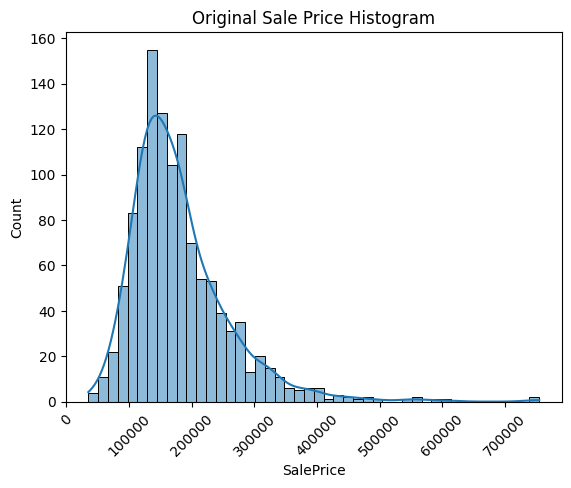

In [3]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

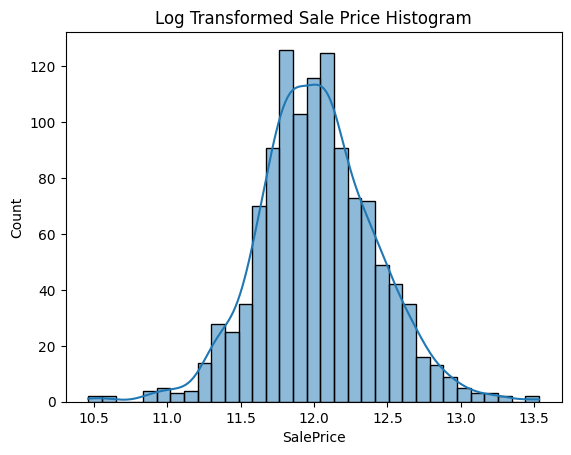

In [4]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

# 데이터 전처리

In [5]:
# 결측치
house_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,218
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [6]:
remaining_nulls = house_df.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]

if not remaining_nulls.empty:
    null_percentages = (remaining_nulls / len(house_df)) * 100
    null_df = pd.DataFrame({'Null Count': remaining_nulls, 'Null Percentage': null_percentages})
    print('Remaining Null Values and their Percentages:')
    print(null_df.sort_values(by='Null Percentage', ascending=False))
else:
    print('No remaining null values in the DataFrame.')

Remaining Null Values and their Percentages:
              Null Count  Null Percentage
PoolQC              1162        99.486301
MiscFeature         1120        95.890411
Alley               1098        94.006849
Fence                941        80.565068
MasVnrType           694        59.417808
FireplaceQu          545        46.660959
LotFrontage          218        18.664384
GarageType            69         5.907534
GarageYrBlt           69         5.907534
GarageFinish          69         5.907534
GarageQual            69         5.907534
GarageCond            69         5.907534
BsmtExposure          24         2.054795
BsmtFinType2          24         2.054795
BsmtQual              23         1.969178
BsmtCond              23         1.969178
BsmtFinType1          23         1.969178
MasVnrArea             8         0.684932
Electrical             1         0.085616


In [7]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

for col in house_df.select_dtypes(include=np.number).columns:
    if house_df[col].isnull().any():
        house_df[col].fillna(house_df[col].mean(), inplace=True)

null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print(house_df.dtypes[null_column_count.index])

# 이제 문자형 피처를 제외하고는 null값 없음.

BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [8]:
# 문자형 컬럼 ohe
house_df_ohe = pd.get_dummies(house_df)
print(house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print(house_df_ohe.dtypes[null_column_count.index])

(1168, 264)
Series([], dtype: object)


In [9]:
# 이상치 처리

from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features = house_df[features_index].apply(lambda x: skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.760540
OpenPorchSF       2.454159
MasVnrArea        2.418589
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [10]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [11]:
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

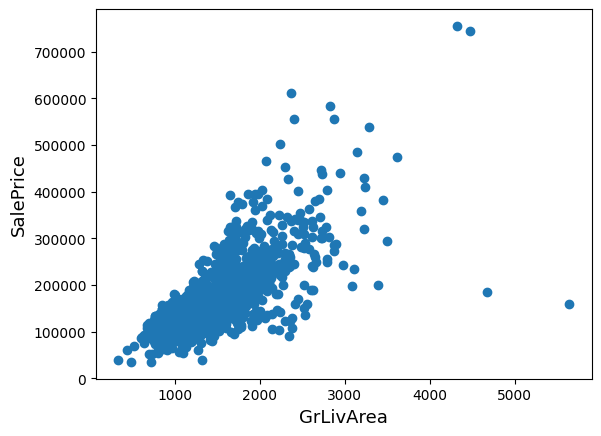

In [12]:
# GrLiveArea

plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [14]:
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index: ', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape: ', house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape: ', house_df_ohe.shape)

이상치 레코드 index:  [ 64 373]
이상치 삭제 전 house_df_ohe shape:  (1168, 264)
이상치 삭제 후 house_df_ohe shape:  (1166, 264)


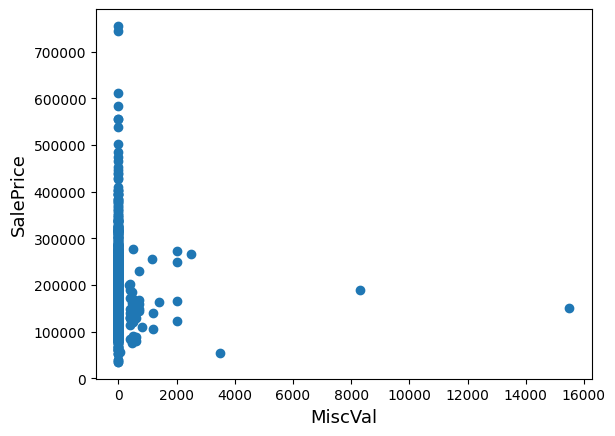

In [13]:
# MiscVal

plt.scatter(x = house_df_org['MiscVal'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MiscVal', fontsize=13)
plt.show()

In [15]:
cond3 = house_df_ohe['MiscVal'] > np.log1p(8000)
cond4 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond3 & cond4].index

print('이상치 레코드 index: ', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape: ', house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape: ', house_df_ohe.shape)

이상치 레코드 index:  [215 731]
이상치 삭제 전 house_df_ohe shape:  (1166, 264)
이상치 삭제 후 house_df_ohe shape:  (1164, 264)


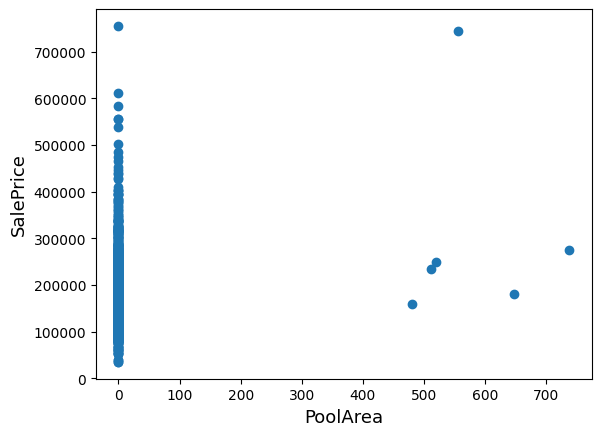

In [16]:
# PoolArea

plt.scatter(x = house_df_org['PoolArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('PoolArea', fontsize=13)
plt.show()

In [17]:
cond5 = house_df_ohe['PoolArea'] > np.log1p(400)
cond6 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond5 & cond6].index

print('이상치 레코드 index: ', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape: ', house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape: ', house_df_ohe.shape)

이상치 레코드 index:  [107 174 670 777]
이상치 삭제 전 house_df_ohe shape:  (1164, 264)
이상치 삭제 후 house_df_ohe shape:  (1160, 264)


# 선형 회귀 모델(+L1,L2) 학습, 예측, 평가

In [18]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses=[ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(['SalePrice'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)
# 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
# 릿지
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.1
Ridge 로그 변환된 RMSE: 0.096
Lasso 로그 변환된 RMSE: 0.236


[np.float64(0.10022757959107649),
 np.float64(0.09570750111713285),
 np.float64(0.23574050769235144)]

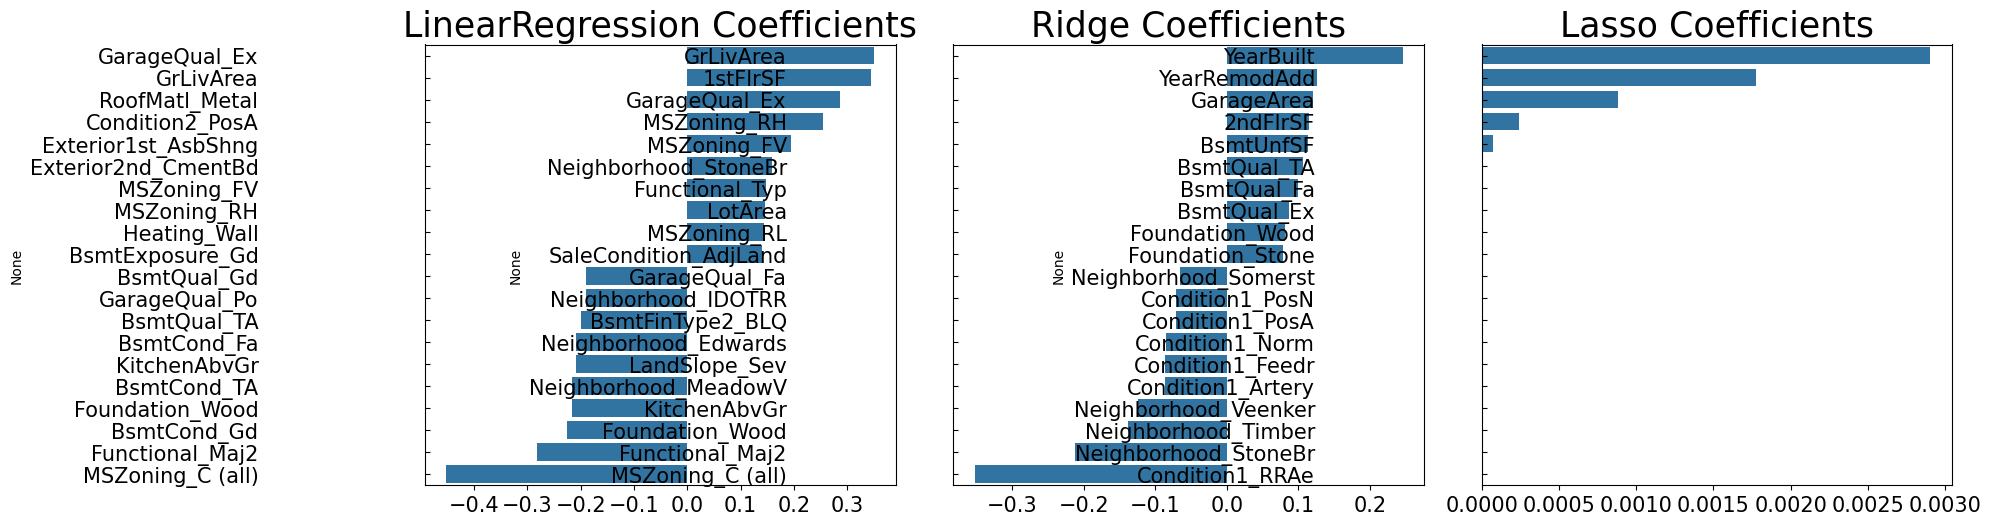

In [20]:
def get_top_bottom_coef(model, n=10):
  coef = pd.Series(model.coef_, index=X_features.columns)

  coef_high = coef.sort_values(ascending=False).head(n)
  coef_low = coef.sort_values(ascending=False).tail(n)
  return coef_high, coef_low

def visualize_coefficient(models):
  fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=3)
  fig.tight_layout()

  for i_num, model in enumerate(models):
    coef_high, coef_low = get_top_bottom_coef(model)
    coef_concat = pd.concat([coef_high, coef_low])

    axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
    axs[i_num].tick_params(axis="y", direction="in", pad=120)
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
      label.set_fontsize(15)
    sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

visualize_coefficient(models)

In [21]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  for model in models:
    rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv=5))
    rmse_avg = np.mean(rmse_list)
    print('\n{0} CV RMSE 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
    print('{0} CV 평균 RMSE: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 릿지, 랏소 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 리스트: [0.131 0.133 0.141 0.12  0.108]
LinearRegression CV 평균 RMSE: 0.126

Ridge CV RMSE 리스트: [0.124 0.125 0.107 0.117 0.106]
Ridge CV 평균 RMSE: 0.116

Lasso CV RMSE 리스트: [0.241 0.273 0.247 0.26  0.227]
Lasso CV 평균 RMSE: 0.25


In [22]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
  grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
  grid_model.fit(X_features, y_target)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                                 np.round(rmse, 4),
                                                                 grid_model.best_params_))
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.115, 최적 alpha: {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1132, 최적 alpha: {'alpha': 0.001}


In [23]:
ridge_params_broad = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 200, 500]}
lasso_params_broad = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params_broad)
print_best_params(lasso_reg, lasso_params_broad)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.115, 최적 alpha: {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1116, 최적 alpha: {'alpha': 0.0005}


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define parameter distributions for Ridge
ridge_param_dist = {'alpha': loguniform(0.001, 1000)}

# Instantiate and fit RandomizedSearchCV for Ridge
rnd_search_ridge = RandomizedSearchCV(estimator=ridge_reg,
                                      param_distributions=ridge_param_dist,
                                      scoring='neg_mean_squared_error',
                                      cv=5,
                                      n_iter=50,
                                      random_state=156)
rnd_search_ridge.fit(X_features, y_target)

# Calculate and print best RMSE and alpha for Ridge
rmse_ridge = np.sqrt(-1 * rnd_search_ridge.best_score_)
print(f"Ridge RandomizedSearchCV Best RMSE: {np.round(rmse_ridge, 4)}, Best Alpha: {rnd_search_ridge.best_params_}")

# Define parameter distributions for Lasso
lasso_param_dist = {'alpha': loguniform(0.0001, 100)}

# Instantiate and fit RandomizedSearchCV for Lasso
rnd_search_lasso = RandomizedSearchCV(estimator=lasso_reg,
                                      param_distributions=lasso_param_dist,
                                      scoring='neg_mean_squared_error',
                                      cv=5,
                                      n_iter=50,
                                      random_state=156)
rnd_search_lasso.fit(X_features, y_target)

# Calculate and print best RMSE and alpha for Lasso
rmse_lasso = np.sqrt(-1 * rnd_search_lasso.best_score_)
print(f"Lasso RandomizedSearchCV Best RMSE: {np.round(rmse_lasso, 4)}, Best Alpha: {lasso_param_dist}")

Ridge RandomizedSearchCV Best RMSE: 0.115, Best Alpha: {'alpha': np.float64(3.7799253246735027)}
Lasso RandomizedSearchCV Best RMSE: 0.112, Best Alpha: {'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78989968c980>}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define parameter distributions for Ridge
ridge_param_dist = {'alpha': loguniform(0.001, 1000)}

# Instantiate and fit RandomizedSearchCV for Ridge
rnd_search_ridge = RandomizedSearchCV(estimator=ridge_reg,
                                      param_distributions=ridge_param_dist,
                                      scoring='neg_mean_squared_error',
                                      cv=5,
                                      n_iter=50,
                                      random_state=156)
rnd_search_ridge.fit(X_features, y_target)

# Calculate and print best RMSE and alpha for Ridge
rmse_ridge = np.sqrt(-1 * rnd_search_ridge.best_score_)
print(f"Ridge RandomizedSearchCV Best RMSE: {np.round(rmse_ridge, 4)}, Best Alpha: {rnd_search_ridge.best_params_}")

# Define parameter distributions for Lasso
lasso_param_dist = {'alpha': loguniform(0.0001, 100)}

# Instantiate and fit RandomizedSearchCV for Lasso
rnd_search_lasso = RandomizedSearchCV(estimator=lasso_reg,
                                      param_distributions=lasso_param_dist,
                                      scoring='neg_mean_squared_error',
                                      cv=5,
                                      n_iter=50,
                                      random_state=156)
rnd_search_lasso.fit(X_features, y_target)

# Calculate and print best RMSE and alpha for Lasso
rmse_lasso = np.sqrt(-1 * rnd_search_lasso.best_score_)
print(f"Lasso RandomizedSearchCV Best RMSE: {np.round(rmse_lasso, 4)}, Best Alpha: {rnd_search_lasso.best_params_}")

Ridge RandomizedSearchCV Best RMSE: 0.115, Best Alpha: {'alpha': np.float64(3.7799253246735027)}
Lasso RandomizedSearchCV Best RMSE: 0.112, Best Alpha: {'alpha': np.float64(0.0007045781187791831)}


LinearRegression 로그 변환된 RMSE: 0.1
Ridge 로그 변환된 RMSE: 0.096
Lasso 로그 변환된 RMSE: 0.095


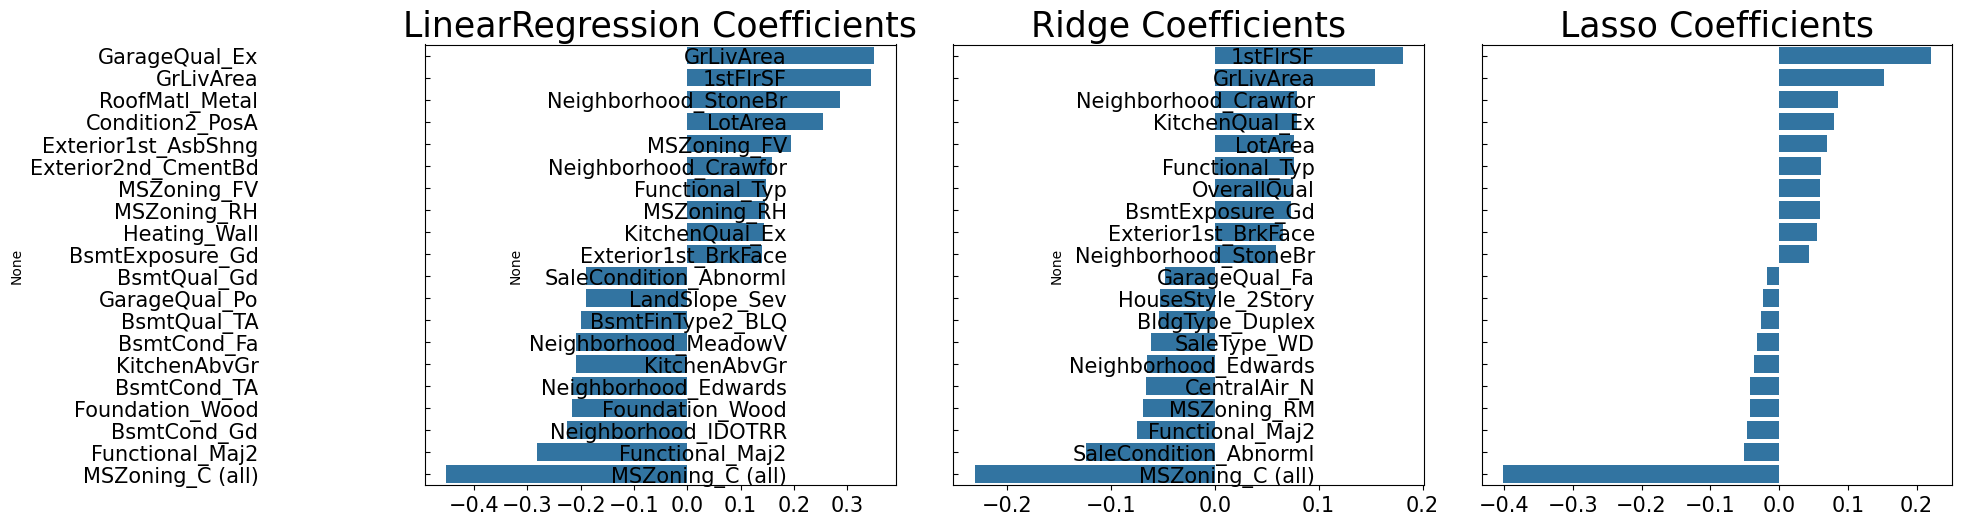

In [26]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=3.78)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.0007)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

# 릿지+라쏘

In [27]:
def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value = preds[key]
    mse = mean_squared_error(y_test, pred_value)
    rmse = np.sqrt(mse)
    print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델의 예측값 혼합 > 최종 예측값 도출
pred = 0.3 * ridge_pred + 0.7 * lasso_pred
preds = {'최종혼합': pred, '릿지': ridge_pred, '랏소': lasso_pred}
get_rmse_pred(preds)

최종혼합 모델의 RMSE: 0.09414110597924503
릿지 모델의 RMSE: 0.09613875144223363
랏소 모델의 RMSE: 0.09455416128533116


# Submission

In [28]:
import numpy as np

# 1. Store the 'Id' column from test_df_org
test_Id = test_df_org['Id']

# 2. Create a working copy of test_df_org
test_df = test_df_org.copy()

# 3. Drop the specified columns from test_df
# Columns dropped from house_df were: 'Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'
columns_to_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
# Drop only if the column exists in test_df
test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns], axis=1, inplace=True)

# 4. Impute numerical missing values
# Identify numerical columns in the original house_df (training data) that had nulls.
# Based on previous analysis, these were 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'.

# Calculate the specific means from house_df_org for these columns for consistent imputation
lot_frontage_mean_train = house_df_org['LotFrontage'].mean()
mas_vnr_area_mean_train = house_df_org['MasVnrArea'].mean()
garage_yr_blt_mean_train = house_df_org['GarageYrBlt'].mean()

# Impute in test_df using training data means for common null columns
if 'LotFrontage' in test_df.columns and test_df['LotFrontage'].isnull().any():
    test_df['LotFrontage'].fillna(lot_frontage_mean_train, inplace=True)
if 'MasVnrArea' in test_df.columns and test_df['MasVnrArea'].isnull().any():
    test_df['MasVnrArea'].fillna(mas_vnr_area_mean_train, inplace=True)
if 'GarageYrBlt' in test_df.columns and test_df['GarageYrBlt'].isnull().any():
    test_df['GarageYrBlt'].fillna(garage_yr_blt_mean_train, inplace=True)

# For any other numerical columns that might have nulls only in test_df,
# fill with the mean of that column from test_df itself.
for col in test_df.select_dtypes(include=np.number).columns:
    if test_df[col].isnull().any():
        test_df[col].fillna(test_df[col].mean(), inplace=True)

# Verify that numerical nulls have been handled
numerical_nulls_test_df = test_df.select_dtypes(include=np.number).isnull().sum()
numerical_nulls_test_df = numerical_nulls_test_df[numerical_nulls_test_df > 0]

if not numerical_nulls_test_df.empty:
    print("Remaining numerical null values in test_df after imputation:")
    print(numerical_nulls_test_df)
else:
    print("No remaining numerical null values in test_df.")

No remaining numerical null values in test_df.


In [29]:
test_df[skew_features_top.index] = np.log1p(test_df[skew_features_top.index])

print("Skewness transformation applied to test_df for the same features as training data.")

Skewness transformation applied to test_df for the same features as training data.


In [30]:
import pandas as pd

# 1. Perform one-hot encoding on test_df
test_df_ohe = pd.get_dummies(test_df)

# Get the list of columns from the training features (X_features)
train_cols = X_features.columns

# 2. Add missing columns to test_df_ohe and fill with zeros
missing_cols = set(train_cols) - set(test_df_ohe.columns)
for c in missing_cols:
    test_df_ohe[c] = 0

# 3. Drop extra columns from test_df_ohe
extra_cols = set(test_df_ohe.columns) - set(train_cols)
test_df_ohe.drop(columns=list(extra_cols), inplace=True)

# 4. Ensure that the columns in test_df_ohe are in the exact same order as X_features
test_df_ohe = test_df_ohe[train_cols]

print(f"Shape of X_features (training data): {X_features.shape}")
print(f"Shape of test_df_ohe (preprocessed test data): {test_df_ohe.shape}")
print(f"All columns in test_df_ohe match X_features: {all(test_df_ohe.columns == X_features.columns)}")


Shape of X_features (training data): (1160, 263)
Shape of test_df_ohe (preprocessed test data): (292, 263)
All columns in test_df_ohe match X_features: True


In [31]:
import numpy as np
import pandas as pd

# 1. Predict SalePrice using the trained Ridge and Lasso models
ridge_test_pred = ridge_reg.predict(test_df_ohe)
lasso_test_pred = lasso_reg.predict(test_df_ohe)

# 2. Blend Predictions using the specified weights
blended_pred = 0.3 * ridge_test_pred + 0.7 * lasso_test_pred

# 3. Inverse Transform Predictions from log-scale back to original SalePrice scale
final_SalePrice = np.expm1(blended_pred)

# 4. Create Submission File
submission_df = pd.DataFrame({'Id': test_Id, 'SalePrice': final_SalePrice})

# 5. Save Submission File to 'submission.csv'
submission_df.to_csv('submission.csv', index=False)

# 6. Verify by displaying the first few rows of the submission file
print("Submission file created successfully. First 5 rows:")
print(submission_df.head())

Submission file created successfully. First 5 rows:
    Id      SalePrice
0   86  267657.441755
1  227  258887.354181
2  492  150335.183087
3   64  138877.793069
4  576  114997.301520


# XGB + LGBM

In [33]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_alpha=0.05, reg_lambda=0.05, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1243, 최적 alpha: {'n_estimators': 1000}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2928
[LightGBM] [Info] Number of data points in the train set: 928, number of used features: 161
[LightGBM] [Info] Start training from score 12.020439
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 928, number of used features: 154
[LightG

In [34]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
xgb_reg.fit(X_train, y_train)

lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_alpha=0.05, reg_lambda=0.05, n_jobs=-1)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종혼합:': pred, 'XGBoost': xgb_pred, 'LightGBM': lgbm_pred}
get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 928, number of used features: 154
[LightGBM] [Info] Start training from score 12.020657
최종혼합: 모델의 RMSE: 0.10250667278063144
XGBoost 모델의 RMSE: 0.10924653536831516
LightGBM 모델의 RMSE: 0.10396120325863978


# Submission

In [35]:
xgb_test_pred = xgb_reg.predict(test_df_ohe)
lgbm_test_pred = lgbm_reg.predict(test_df_ohe)

blended_pred = 0.5 * xgb_test_pred + 0.5 * lgbm_test_pred

print("XGBoost predictions on test data generated.")
print("LightGBM predictions on test data generated.")
print("Blended predictions (0.5 * XGB + 0.5 * LGBM) generated.")

XGBoost predictions on test data generated.
LightGBM predictions on test data generated.
Blended predictions (0.5 * XGB + 0.5 * LGBM) generated.


In [36]:
import numpy as np
import pandas as pd

# 1. Inverse Transform Predictions from log-scale back to original SalePrice scale
final_SalePrice_xgb_lgbm = np.expm1(blended_pred)

# 2. Create Submission File
submission_df_xgb_lgbm = pd.DataFrame({'Id': test_Id, 'SalePrice': final_SalePrice_xgb_lgbm})

# 3. Save Submission File to 'submission_xgb_lgbm.csv'
submission_df_xgb_lgbm.to_csv('submission_xgb_lgbm.csv', index=False)

print("Submission file 'submission_xgb_lgbm.csv' created successfully. First 5 rows:")
print(submission_df_xgb_lgbm.head())

Submission file 'submission_xgb_lgbm.csv' created successfully. First 5 rows:
    Id      SalePrice
0   86  264593.160094
1  227  265987.911897
2  492  148524.728401
3   64  140075.187182
4  576  111418.289466


# 스태킹 앙상블 모델

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  kf = KFold(n_splits=n_folds, shuffle=False)
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
    test_pred[:, folder_counter] = model.predict(X_test_n)

  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
  return train_fold_pred, test_pred_mean

In [38]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
Lasso model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
XGBRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
LGBMRegressor model 시작
	 폴드 세트:  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2657
[LightGBM] [Info] Number of data points in the train set: 742, number of used features: 144
[LightGBM] [Info] Start training from score 12.016940
	 폴드 세트:  1 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2658
[Lig

In [39]:
stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_lasso = Lasso(alpha=0.0007)

meta_model_lasso.fit(stack_final_X_train, y_train)
final = meta_model_lasso.predict(stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('최종 메타 모델의 RMSE 값: {:.3f}'.format(rmse))

최종 메타 모델의 RMSE 값: 0.093


# Submission_lasso

In [40]:
stacking_lasso_pred = meta_model_lasso.predict(stack_final_X_test)
print("Predictions using stacking Lasso meta-model generated.")

Predictions using stacking Lasso meta-model generated.


In [41]:
final_SalePrice_stacking = np.expm1(stacking_lasso_pred)
print("Inverse transformation (np.expm1) applied to stacking_lasso_pred.")

Inverse transformation (np.expm1) applied to stacking_lasso_pred.


In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Updated function to generate predictions for meta-model training (oof), meta-model validation, and final submission
def get_stacking_datasets(model, X_train_base, y_train_base, X_val_base, X_submission_base, n_folds):
  kf = KFold(n_splits=n_folds, shuffle=False)

  # Predictions for meta-model training (out-of-fold predictions on X_train_base)
  meta_train_pred = np.zeros((X_train_base.shape[0], 1))

  # Predictions for meta-model evaluation (predictions on X_val_base)
  meta_val_pred_folds = np.zeros((X_val_base.shape[0], n_folds))

  # Predictions for final submission (predictions on X_submission_base)
  meta_submission_pred_folds = np.zeros((X_submission_base.shape[0], n_folds))

  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_base)):
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_base[train_index]
    y_tr = y_train_base[train_index]
    X_va = X_train_base[valid_index] # Validation set for current fold

    model.fit(X_tr, y_tr)
    meta_train_pred[valid_index, :] = model.predict(X_va).reshape(-1, 1)
    meta_val_pred_folds[:, folder_counter] = model.predict(X_val_base)
    meta_submission_pred_folds[:, folder_counter] = model.predict(X_submission_base)

  meta_val_pred_mean = np.mean(meta_val_pred_folds, axis=1).reshape(-1,1)
  meta_submission_pred_mean = np.mean(meta_submission_pred_folds, axis=1).reshape(-1,1)

  return meta_train_pred, meta_val_pred_mean, meta_submission_pred_mean

In [44]:
X_train_n = X_train.values
y_train_n = y_train.values
X_val_n = X_test.values # This will be the meta-model's validation set
X_submission_n = test_df_ohe.values # This is the actual test data for final submission

ridge_train, ridge_val, ridge_submission = get_stacking_datasets(ridge_reg, X_train_n, y_train_n, X_val_n, X_submission_n, 5)
lasso_train, lasso_val, lasso_submission = get_stacking_datasets(lasso_reg, X_train_n, y_train_n, X_val_n, X_submission_n, 5)
xgb_train, xgb_val, xgb_submission = get_stacking_datasets(xgb_reg, X_train_n, y_train_n, X_val_n, X_submission_n, 5)
lgbm_train, lgbm_val, lgbm_submission = get_stacking_datasets(lgbm_reg, X_train_n, y_train_n, X_val_n, X_submission_n, 5)

Ridge model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
Lasso model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
XGBRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
LGBMRegressor model 시작
	 폴드 세트:  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2657
[LightGBM] [Info] Number of data points in the train set: 742, number of used features: 144
[LightGBM] [Info] Start training from score 12.016940
	 폴드 세트:  1 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2658
[Lig

In [45]:
stack_final_X_train_meta = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
stack_final_X_submission_meta = np.concatenate((ridge_submission, lasso_submission, xgb_submission, lgbm_submission), axis=1)

# Define and train the meta-model
meta_model_lasso = Lasso(alpha=0.0007)
meta_model_lasso.fit(stack_final_X_train_meta, y_train_n)

print("Meta-model training complete. Final feature sets for stacking created.")

Meta-model training complete. Final feature sets for stacking created.


In [46]:
stacking_lasso_pred_submission = meta_model_lasso.predict(stack_final_X_submission_meta)
print("Predictions using stacking Lasso meta-model on submission data generated.")

Predictions using stacking Lasso meta-model on submission data generated.


In [47]:
final_SalePrice_stacking_submission = np.expm1(stacking_lasso_pred_submission)
print("Inverse transformation (np.expm1) applied to stacking_lasso_pred_submission.")

Inverse transformation (np.expm1) applied to stacking_lasso_pred_submission.


In [48]:
submission_df_stacking = pd.DataFrame({'Id': test_Id, 'SalePrice': final_SalePrice_stacking_submission})
submission_df_stacking.to_csv('submission_stacking.csv', index=False)

print("Submission file 'submission_stacking.csv' created successfully. First 5 rows:")
print(submission_df_stacking.head())

Submission file 'submission_stacking.csv' created successfully. First 5 rows:
    Id      SalePrice
0   86  271488.258399
1  227  263279.579187
2  492  149093.148590
3   64  137647.527577
4  576  113047.099874


# Submission_릿지

In [49]:
from sklearn.linear_model import Ridge

# Instantiate Ridge meta-model with the optimal alpha
meta_model_ridge = Ridge(alpha=3.7799253246735027)

# Train the meta-model
meta_model_ridge.fit(stack_final_X_train_meta, y_train_n)

print("Ridge meta-model defined and trained successfully.")

Ridge meta-model defined and trained successfully.


In [50]:
ridge_stacking_pred_submission = meta_model_ridge.predict(stack_final_X_submission_meta)
print("Predictions using stacking Ridge meta-model on submission data generated.")

Predictions using stacking Ridge meta-model on submission data generated.


In [51]:
final_SalePrice_ridge_stacking_submission = np.expm1(ridge_stacking_pred_submission)
print("Inverse transformation (np.expm1) applied to ridge_stacking_pred_submission.")

Inverse transformation (np.expm1) applied to ridge_stacking_pred_submission.


In [52]:
submission_df_ridge_stacking = pd.DataFrame({'Id': test_Id, 'SalePrice': final_SalePrice_ridge_stacking_submission})
submission_df_ridge_stacking.to_csv('submission_ridge_stacking.csv', index=False)

print("Submission file 'submission_ridge_stacking.csv' created successfully. First 5 rows:")
print(submission_df_ridge_stacking.head())

Submission file 'submission_ridge_stacking.csv' created successfully. First 5 rows:
    Id      SalePrice
0   86  272610.335205
1  227  264983.040310
2  492  149171.570130
3   64  137905.088843
4  576  112892.087312
